In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
sys.path.append('..')


In [10]:
import pandas as pd
import autograd.numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

from utils.models import BNN


In [ ]:
display(Image(filename='../imgs/neural_net_unit_test_schematic.JPG'))


In [ ]:
hidden_layers = [2,3,2]
biases =      [1,0,0,1]
activations = ['relu','relu','linear','linear']

architecture = {
    'input_n' : 2,
    'output_n' : 2,
    'hidden_layers' : hidden_layers,
    'biases' : biases,
    'activations' : activations,
}

layer1 = np.array([
    [ 1, 0.5],
    [ 3,   1],
    [-2,   1],
])

layer2 = np.array([
    [0, 1,  0],
    [2, 3, -1],
])

layer3 = np.array([
    [0.5,  1],
    [  2, -2],
    [  0,  2],
])

layer4 = np.array([
    [1, -1],
    [1,  2],
    [1,  1],
])

# layer5 = np.array([
#     [1, 0],
#     [0, 1],
# ])

W_layers = [layer1,layer2,layer3,layer4]

X = np.array([[4,-2]])
Y = np.array([[4,-14]])

# Calculate output for each layer:
partial_networks = []
for i in range(1,len(W_layers)+1):
    arch = architecture.copy()
    arch['hidden_layers'] = hidden_layers[:(i-1)]
    arch['biases'] = biases[:i]
    arch['activations'] = activations[:i]
    if i < len(W_layers):
        arch['output_n'] = hidden_layers[i-1]

    bnn = BNN(arch)
    bnn.set_weights(W_layers[:i])
    partial_networks.append(bnn)

    print(f"Layer {i} :",bnn.forward(X))
    
bnn = BNN(architecture)
bnn.set_weights(W_layers)


In [6]:
# from utils.models import BNN_LV

# arch = architecture
# arch['gamma'] = 0.4
# arch['sigma'] = [0.5,0.3]
# bnn_lv = BNN_LV(architecture)
# W_layers_lv = W_layers.copy()
# W_layers_lv[0] = np.array([
#     [ 1, 0.5],
#     [ 3,   1],
#     [ 1,   0],  # Noise feature.
#     [-2,   1],
# ])
# bnn_lv.set_weights(W_layers_lv)
# bnn_lv.forward(X)


### Demo - Fit Method

In [11]:
data = pd.read_csv('../data/HW8_data.csv')
X_train = np.array(data['x']).reshape(12,1)
y_train = np.array(data['y']).reshape(12,1)

In [12]:
architecture = {'input_n':1, 
             'output_n':1, 
             'hidden_layers':[5],
             'biases' : [1,1],
             'activations' : ['relu', 'linear']}
test_bnn = BNN(architecture=architecture)

In [13]:
test_bnn.fit(X_train, y_train, step_size=0.01, max_iteration=5000, check_point=500, regularization_coef=None)

Iteration 0 lower bound 17.655229268765787; gradient mag: 58.620489012646125
Iteration 500 lower bound 0.19528861170881953; gradient mag: 0.4217812718800171
Iteration 1000 lower bound 0.18449977329033998; gradient mag: 0.04213316657096096
Iteration 1500 lower bound 0.17461629723226746; gradient mag: 0.051361824564344655
Iteration 2000 lower bound 0.1730955238215819; gradient mag: 0.04494319796664014
Iteration 2500 lower bound 0.17139894213233886; gradient mag: 0.2864723434091904
Iteration 3000 lower bound 0.16937954035967143; gradient mag: 0.03597030850648959
Iteration 3500 lower bound 0.16738975530902167; gradient mag: 0.08865017487032446
Iteration 4000 lower bound 0.16566796983266321; gradient mag: 0.036935060346530026
Iteration 4500 lower bound 0.16458610812413085; gradient mag: 0.06812436349264003


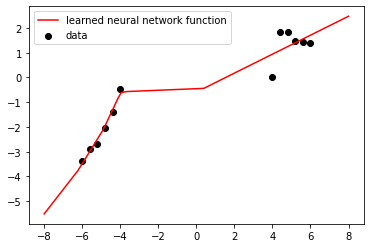

In [14]:
# SAME PLOT FROM HW8
x_test = np.linspace(-8, 8, 100).reshape((1, -1))
#predict on the test x-values
y_test_pred = test_bnn.forward(x_test.reshape(100,1))
#visualize the function learned by the neural network
plt.scatter(X_train.flatten(), y_train.flatten(), color='black', label='data')
plt.plot(x_test.flatten(), y_test_pred.flatten(), color='red', label='learned neural network function')
plt.legend(loc='best')
plt.show()